In [3]:
#the datase used contains detailed data of customers of a compagny

#In this project, I will be performing an unsupervised clustering of data on the customer's records from a groceries firm's database.
# i will use unsupervised ML technique (KMeans Clustering Algorithm) in the simplest form.
#I will divide customers into segments to optimize the significance of each customer to the business. 


In [11]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
df=pd.read_csv("C:/Users/EXTRA/Downloads/marketing_campaign (1).csv", sep="\t")
df



,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [12]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [13]:
#Data preprocessing
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [14]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [15]:
df["Income"].fillna(df["Income"].mean(), inplace=True)
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [16]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [17]:
df["Education"].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [18]:
df["Education"]=df["Education"].replace({"Graduation":"Graduate", "PhD":"Postgraduate", "Master":"Postgraduate", "2n Cycle":"Postgraduate", "Basic":"Undergraduate"})
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduate,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduate,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduate,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduate,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,Postgraduate,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduate,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,Postgraduate,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduate,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Postgraduate,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [19]:
df["Education"].value_counts()

Graduate         1127
Postgraduate     1059
Undergraduate      54
Name: Education, dtype: int64

In [20]:
df["Marital_Status"].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [21]:
df["Marital_Status"]=df["Marital_Status"].replace({"Married":"Relationship","Together":"Relationship","Single":"Single","Divorced":"Single", "Widow":"Single","Alone":"Single","Absurd":"Single","YOLO":"Single"})
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduate,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduate,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduate,Relationship,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduate,Relationship,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,Postgraduate,Relationship,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduate,Relationship,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,Postgraduate,Relationship,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduate,Single,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Postgraduate,Relationship,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [22]:
#combine several features into new feature

df["Total_Expense"]=df["MntWines"] + df["MntFruits"] + df["MntMeatProducts"] + df["MntFishProducts"] + df["MntSweetProducts"] + df["MntGoldProds"]
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Total_Expense
0,5524,1957,Graduate,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,0,3,11,1,1617
1,2174,1954,Graduate,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,0,3,11,0,27
2,4141,1965,Graduate,Relationship,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,0,3,11,0,776
3,6182,1984,Graduate,Relationship,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,0,3,11,0,53
4,5324,1981,Postgraduate,Relationship,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,0,3,11,0,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduate,Relationship,61223.0,0,1,13-06-2013,46,709,...,0,0,0,0,0,0,3,11,0,1341
2236,4001,1946,Postgraduate,Relationship,64014.0,2,1,10-06-2014,56,406,...,0,0,0,1,0,0,3,11,0,444
2237,7270,1981,Graduate,Single,56981.0,0,0,25-01-2014,91,908,...,0,1,0,0,0,0,3,11,0,1241
2238,8235,1956,Postgraduate,Relationship,69245.0,0,1,24-01-2014,8,428,...,0,0,0,0,0,0,3,11,0,843


In [23]:
df["Total_children"]=df["Kidhome"]+df["Teenhome"]
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Total_Expense,Total_children
0,5524,1957,Graduate,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,3,11,1,1617,0
1,2174,1954,Graduate,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,3,11,0,27,2
2,4141,1965,Graduate,Relationship,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,3,11,0,776,0
3,6182,1984,Graduate,Relationship,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,3,11,0,53,1
4,5324,1981,Postgraduate,Relationship,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,3,11,0,422,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduate,Relationship,61223.0,0,1,13-06-2013,46,709,...,0,0,0,0,0,3,11,0,1341,1
2236,4001,1946,Postgraduate,Relationship,64014.0,2,1,10-06-2014,56,406,...,0,0,1,0,0,3,11,0,444,3
2237,7270,1981,Graduate,Single,56981.0,0,0,25-01-2014,91,908,...,1,0,0,0,0,3,11,0,1241,0
2238,8235,1956,Postgraduate,Relationship,69245.0,0,1,24-01-2014,8,428,...,0,0,0,0,0,3,11,0,843,1


In [24]:
df["Total_accepted_campaign"]=df["AcceptedCmp3"]+df["AcceptedCmp4"]+df["AcceptedCmp5"]+df["AcceptedCmp1"]+df["AcceptedCmp2"]+df["Response"]
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Total_Expense,Total_children,Total_accepted_campaign
0,5524,1957,Graduate,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,3,11,1,1617,0,1
1,2174,1954,Graduate,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,3,11,0,27,2,0
2,4141,1965,Graduate,Relationship,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,3,11,0,776,0,0
3,6182,1984,Graduate,Relationship,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,3,11,0,53,1,0
4,5324,1981,Postgraduate,Relationship,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,3,11,0,422,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduate,Relationship,61223.0,0,1,13-06-2013,46,709,...,0,0,0,0,3,11,0,1341,1,0
2236,4001,1946,Postgraduate,Relationship,64014.0,2,1,10-06-2014,56,406,...,0,1,0,0,3,11,0,444,3,1
2237,7270,1981,Graduate,Single,56981.0,0,0,25-01-2014,91,908,...,0,0,0,0,3,11,0,1241,0,1
2238,8235,1956,Postgraduate,Relationship,69245.0,0,1,24-01-2014,8,428,...,0,0,0,0,3,11,0,843,1,0


In [25]:
df["Total_Purchases"]=df["NumDealsPurchases"]+df["NumWebPurchases"]+df["NumCatalogPurchases"]+df["NumStorePurchases"]
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Total_Expense,Total_children,Total_accepted_campaign,Total_Purchases
0,5524,1957,Graduate,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,3,11,1,1617,0,1,25
1,2174,1954,Graduate,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,3,11,0,27,2,0,6
2,4141,1965,Graduate,Relationship,71613.0,0,0,21-08-2013,26,426,...,0,0,0,3,11,0,776,0,0,21
3,6182,1984,Graduate,Relationship,26646.0,1,0,10-02-2014,26,11,...,0,0,0,3,11,0,53,1,0,8
4,5324,1981,Postgraduate,Relationship,58293.0,1,0,19-01-2014,94,173,...,0,0,0,3,11,0,422,1,0,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduate,Relationship,61223.0,0,1,13-06-2013,46,709,...,0,0,0,3,11,0,1341,1,0,18
2236,4001,1946,Postgraduate,Relationship,64014.0,2,1,10-06-2014,56,406,...,1,0,0,3,11,0,444,3,1,22
2237,7270,1981,Graduate,Single,56981.0,0,0,25-01-2014,91,908,...,0,0,0,3,11,0,1241,0,1,19
2238,8235,1956,Postgraduate,Relationship,69245.0,0,1,24-01-2014,8,428,...,0,0,0,3,11,0,843,1,0,23


In [26]:
# Generate new features using old features
# Calculate customer Age

df["Age"]=2015- df["Year_Birth"]
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Total_Expense,Total_children,Total_accepted_campaign,Total_Purchases,Age
0,5524,1957,Graduate,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,3,11,1,1617,0,1,25,58
1,2174,1954,Graduate,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,3,11,0,27,2,0,6,61
2,4141,1965,Graduate,Relationship,71613.0,0,0,21-08-2013,26,426,...,0,0,3,11,0,776,0,0,21,50
3,6182,1984,Graduate,Relationship,26646.0,1,0,10-02-2014,26,11,...,0,0,3,11,0,53,1,0,8,31
4,5324,1981,Postgraduate,Relationship,58293.0,1,0,19-01-2014,94,173,...,0,0,3,11,0,422,1,0,19,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduate,Relationship,61223.0,0,1,13-06-2013,46,709,...,0,0,3,11,0,1341,1,0,18,48
2236,4001,1946,Postgraduate,Relationship,64014.0,2,1,10-06-2014,56,406,...,0,0,3,11,0,444,3,1,22,69
2237,7270,1981,Graduate,Single,56981.0,0,0,25-01-2014,91,908,...,0,0,3,11,0,1241,0,1,19,34
2238,8235,1956,Postgraduate,Relationship,69245.0,0,1,24-01-2014,8,428,...,0,0,3,11,0,843,1,0,23,59


In [27]:
#Dropping Unnecessary columns

Columns_to_drop=["ID","Year_Birth","Z_CostContact","Z_Revenue","Dt_Customer","AcceptedCmp3","AcceptedCmp4","AcceptedCmp5","AcceptedCmp1","AcceptedCmp2","Response"]

df.drop(columns=Columns_to_drop, axis=1, inplace= True)
df

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Total_Expense,Total_children,Total_accepted_campaign,Total_Purchases,Age
0,Graduate,Single,58138.0,0,0,58,635,88,546,172,...,8,10,4,7,0,1617,0,1,25,58
1,Graduate,Single,46344.0,1,1,38,11,1,6,2,...,1,1,2,5,0,27,2,0,6,61
2,Graduate,Relationship,71613.0,0,0,26,426,49,127,111,...,8,2,10,4,0,776,0,0,21,50
3,Graduate,Relationship,26646.0,1,0,26,11,4,20,10,...,2,0,4,6,0,53,1,0,8,31
4,Postgraduate,Relationship,58293.0,1,0,94,173,43,118,46,...,5,3,6,5,0,422,1,0,19,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduate,Relationship,61223.0,0,1,46,709,43,182,42,...,9,3,4,5,0,1341,1,0,18,48
2236,Postgraduate,Relationship,64014.0,2,1,56,406,0,30,0,...,8,2,5,7,0,444,3,1,22,69
2237,Graduate,Single,56981.0,0,0,91,908,48,217,32,...,2,3,13,6,0,1241,0,1,19,34
2238,Postgraduate,Relationship,69245.0,0,1,8,428,30,214,80,...,6,5,10,3,0,843,1,0,23,59


In [28]:
# Machine learning

#label encoding
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df["Education"]=encoder.fit_transform(df["Education"])
df["Marital_Status"]=encoder.fit_transform(df["Marital_Status"])
df

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Total_Expense,Total_children,Total_accepted_campaign,Total_Purchases,Age
0,0,1,58138.0,0,0,58,635,88,546,172,...,8,10,4,7,0,1617,0,1,25,58
1,0,1,46344.0,1,1,38,11,1,6,2,...,1,1,2,5,0,27,2,0,6,61
2,0,0,71613.0,0,0,26,426,49,127,111,...,8,2,10,4,0,776,0,0,21,50
3,0,0,26646.0,1,0,26,11,4,20,10,...,2,0,4,6,0,53,1,0,8,31
4,1,0,58293.0,1,0,94,173,43,118,46,...,5,3,6,5,0,422,1,0,19,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0,0,61223.0,0,1,46,709,43,182,42,...,9,3,4,5,0,1341,1,0,18,48
2236,1,0,64014.0,2,1,56,406,0,30,0,...,8,2,5,7,0,444,3,1,22,69
2237,0,1,56981.0,0,0,91,908,48,217,32,...,2,3,13,6,0,1241,0,1,19,34
2238,1,0,69245.0,0,1,8,428,30,214,80,...,6,5,10,3,0,843,1,0,23,59


In [29]:
df.describe()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Total_Expense,Total_children,Total_accepted_campaign,Total_Purchases,Age
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,0.520982,0.355357,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,4.084821,2.662054,5.790179,5.316518,0.009375,605.798214,0.950446,0.446875,14.862054,46.194196
std,0.545809,0.478728,25037.797168,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.778714,2.923101,3.250958,2.426645,0.096391,602.249288,0.751803,0.890543,7.677173,11.984069
min,0.000000,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,19.000000
25%,0.000000,0.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,2.000000,0.000000,3.000000,3.000000,0.000000,68.750000,0.000000,0.000000,8.000000,38.000000
50%,0.000000,0.000000,51741.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,4.000000,2.000000,5.000000,6.000000,0.000000,396.000000,1.000000,0.000000,15.000000,45.000000
75%,1.000000,1.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,6.000000,4.000000,8.000000,7.000000,0.000000,1045.500000,1.000000,1.000000,21.000000,56.000000
max,2.000000,1.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,27.000000,28.000000,13.000000,20.000000,1.000000,2525.000000,3.000000,5.000000,44.000000,122.000000


In [30]:
#This gives a few insights on the population.

#average income is 52247.25
#average age of the population is approx 46 years.
#75% of the population has 1 kid and 1 teen at home.
#on an average people spend 303 on vine and 167 on meat products.
#average expenses on fruits, fish, sweet and gold are relitevely low.

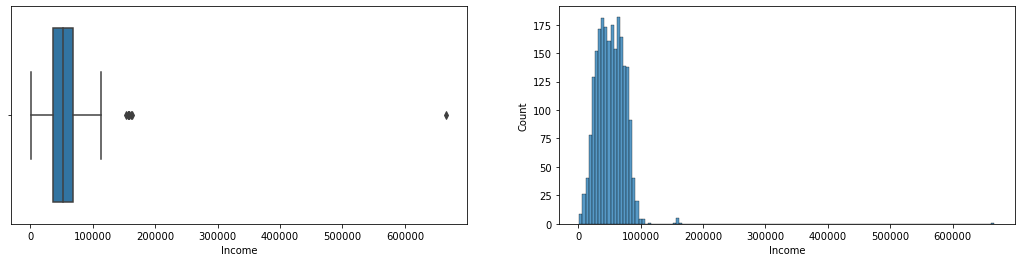

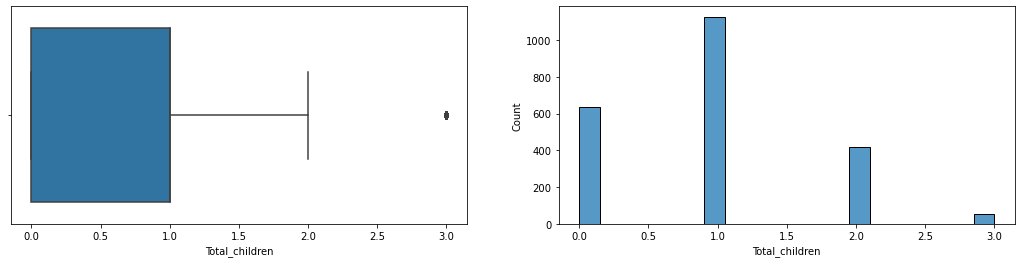

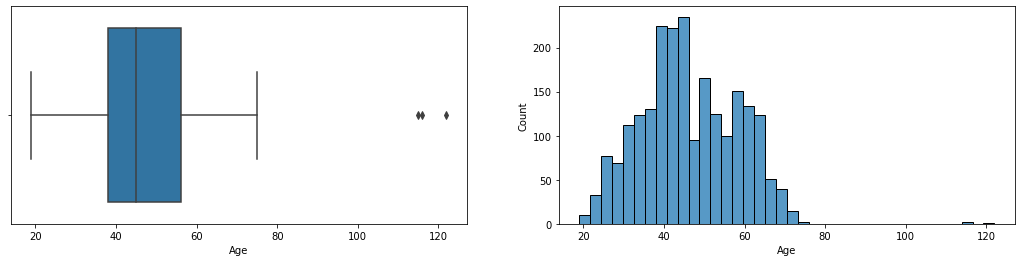

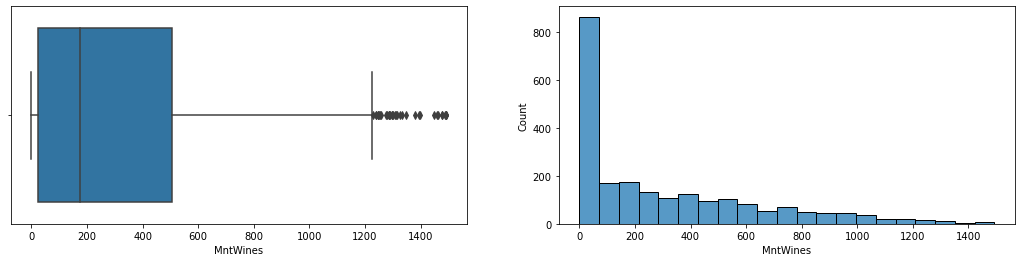

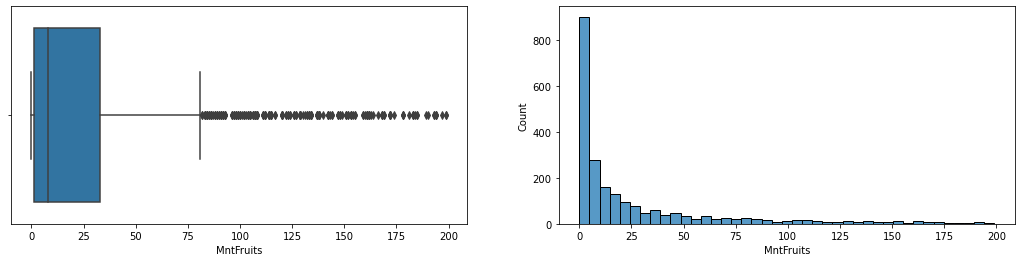

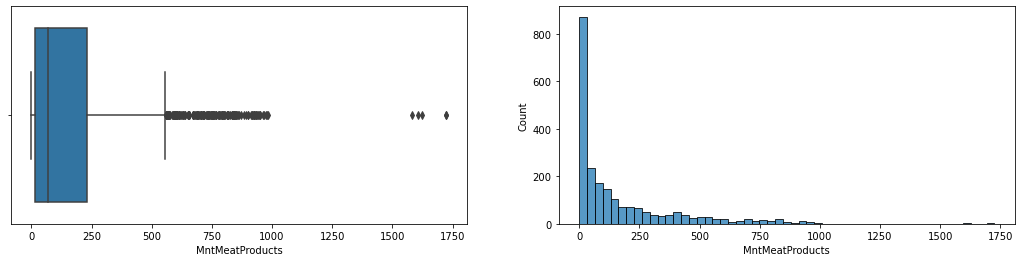

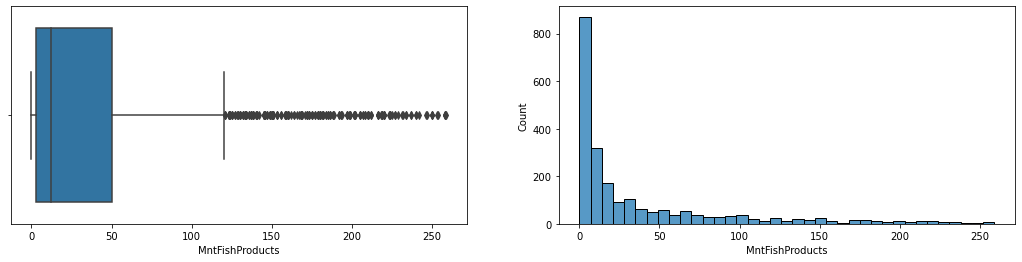

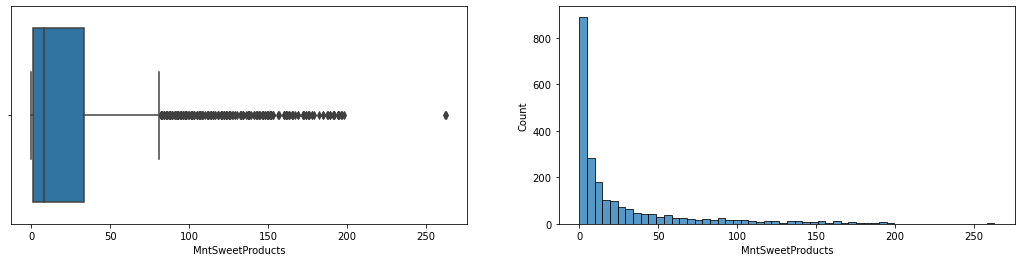

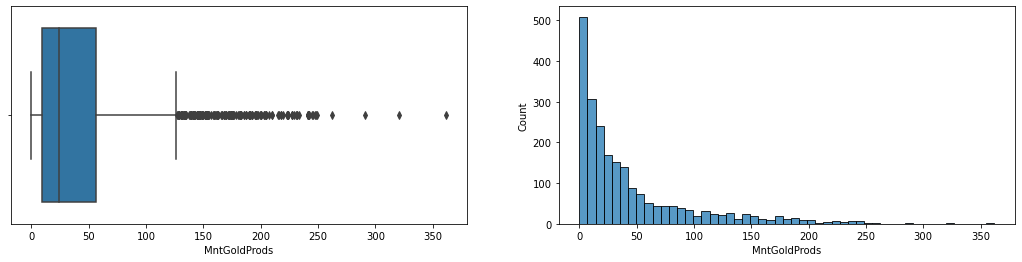

In [31]:
# Data visualization


col=['Income','Total_children','Age','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']

import matplotlib.pyplot as plt
import numpy as np
 
 
for i in col:
    plt.figure(figsize=(18,4))
    plt.subplot(1,2,1)
    sns.boxplot(x=df[i],data=df)
    plt.subplot(1,2,2)
    sns.histplot(x=df[i],data=df)
    plt.show()


In [32]:
# Features Normalization

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
scaled_feautures= StandardScaler().fit_transform(df.values)
scaled_df=pd.DataFrame(scaled_feautures, index=df.index, columns=df.columns)
scaled_df

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Total_Expense,Total_children,Total_accepted_campaign,Total_Purchases,Age
0,-0.954727,1.346874,0.235327,-0.825218,-0.929894,0.307039,0.983781,1.551577,1.679702,2.462147,...,1.409304,2.510890,-0.550785,0.693904,-0.097282,1.679417,-1.264505,0.621248,1.320826,0.985345
1,-0.954727,1.346874,-0.235826,1.032559,0.906934,-0.383664,-0.870479,-0.636301,-0.713225,-0.650449,...,-1.110409,-0.568720,-1.166125,-0.130463,-0.097282,-0.961275,1.396361,-0.501912,-1.154596,1.235733
2,-0.954727,-0.742460,0.773633,-0.825218,-0.929894,-0.798086,0.362723,0.570804,-0.177032,1.345274,...,1.409304,-0.226541,1.295237,-0.542647,-0.097282,0.282673,-1.264505,-0.501912,0.799685,0.317643
3,-0.954727,-0.742460,-1.022732,1.032559,-0.929894,-0.798086,-0.870479,-0.560857,-0.651187,-0.503974,...,-0.750450,-0.910898,-0.550785,0.281720,-0.097282,-0.918094,0.065928,-0.501912,-0.894025,-1.268149
4,0.877826,-0.742460,0.241519,1.032559,-0.929894,1.550305,-0.389085,0.419916,-0.216914,0.155164,...,0.329427,0.115638,0.064556,-0.130463,-0.097282,-0.305254,0.065928,-0.501912,0.539114,-1.017761
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,-0.954727,-0.742460,0.358568,-0.825218,0.906934,-0.107383,1.203678,0.419916,0.066692,0.081926,...,1.769263,0.115638,-0.550785,-0.130463,-0.097282,1.221032,0.065928,-0.501912,0.408829,0.150717
2236,0.877826,-0.742460,0.470064,2.890335,0.906934,0.237969,0.303291,-0.661449,-0.606873,-0.687068,...,1.409304,-0.226541,-0.243114,0.693904,-0.097282,-0.268717,2.726794,0.621248,0.929970,1.903435
2237,-0.954727,1.346874,0.189106,-0.825218,-0.929894,1.446700,1.795020,0.545656,0.221789,-0.101168,...,-0.750450,0.115638,2.218248,0.281720,-0.097282,1.054951,-1.264505,0.621248,0.539114,-1.017761
2238,0.877826,-0.742460,0.679035,-0.825218,0.906934,-1.419719,0.368666,0.092992,0.208495,0.777683,...,0.689386,0.799996,1.295237,-0.954831,-0.097282,0.393948,0.065928,-0.501912,1.060255,1.068807


In [33]:
#Initiating PCA to reduce dimentions  features to 3
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(scaled_df)
PCA_df = pd.DataFrame(pca.transform(scaled_df), columns=(["col1","col2","col3"]))
PCA_df.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2240.0,2.036070e-16,2.844781,-5.040265,-2.649114,-0.610638,2.457248,7.912278
col2,2240.0,2.012279e-17,1.582874,-4.097097,-1.342153,-0.165989,1.131637,5.859312
col3,2240.0,2.696256e-17,1.146339,-5.111922,-0.771885,-0.008494,0.815571,5.372575


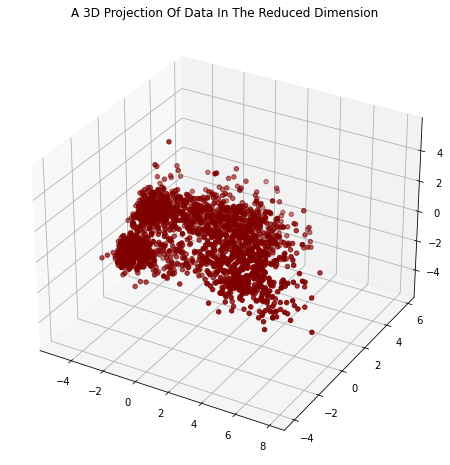

In [34]:
#A 3D Projection Of Data In The Reduced Dimension

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
x =PCA_df["col1"]
y =PCA_df["col2"]
z =PCA_df["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z,c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

In [35]:
scaler=StandardScaler()
df_scaled=pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
df_scaled

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Total_Expense,Total_children,Total_accepted_campaign,Total_Purchases,Age
0,-0.954727,1.346874,0.235327,-0.825218,-0.929894,0.307039,0.983781,1.551577,1.679702,2.462147,...,1.409304,2.510890,-0.550785,0.693904,-0.097282,1.679417,-1.264505,0.621248,1.320826,0.985345
1,-0.954727,1.346874,-0.235826,1.032559,0.906934,-0.383664,-0.870479,-0.636301,-0.713225,-0.650449,...,-1.110409,-0.568720,-1.166125,-0.130463,-0.097282,-0.961275,1.396361,-0.501912,-1.154596,1.235733
2,-0.954727,-0.742460,0.773633,-0.825218,-0.929894,-0.798086,0.362723,0.570804,-0.177032,1.345274,...,1.409304,-0.226541,1.295237,-0.542647,-0.097282,0.282673,-1.264505,-0.501912,0.799685,0.317643
3,-0.954727,-0.742460,-1.022732,1.032559,-0.929894,-0.798086,-0.870479,-0.560857,-0.651187,-0.503974,...,-0.750450,-0.910898,-0.550785,0.281720,-0.097282,-0.918094,0.065928,-0.501912,-0.894025,-1.268149
4,0.877826,-0.742460,0.241519,1.032559,-0.929894,1.550305,-0.389085,0.419916,-0.216914,0.155164,...,0.329427,0.115638,0.064556,-0.130463,-0.097282,-0.305254,0.065928,-0.501912,0.539114,-1.017761
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,-0.954727,-0.742460,0.358568,-0.825218,0.906934,-0.107383,1.203678,0.419916,0.066692,0.081926,...,1.769263,0.115638,-0.550785,-0.130463,-0.097282,1.221032,0.065928,-0.501912,0.408829,0.150717
2236,0.877826,-0.742460,0.470064,2.890335,0.906934,0.237969,0.303291,-0.661449,-0.606873,-0.687068,...,1.409304,-0.226541,-0.243114,0.693904,-0.097282,-0.268717,2.726794,0.621248,0.929970,1.903435
2237,-0.954727,1.346874,0.189106,-0.825218,-0.929894,1.446700,1.795020,0.545656,0.221789,-0.101168,...,-0.750450,0.115638,2.218248,0.281720,-0.097282,1.054951,-1.264505,0.621248,0.539114,-1.017761
2238,0.877826,-0.742460,0.679035,-0.825218,0.906934,-1.419719,0.368666,0.092992,0.208495,0.777683,...,0.689386,0.799996,1.295237,-0.954831,-0.097282,0.393948,0.065928,-0.501912,1.060255,1.068807


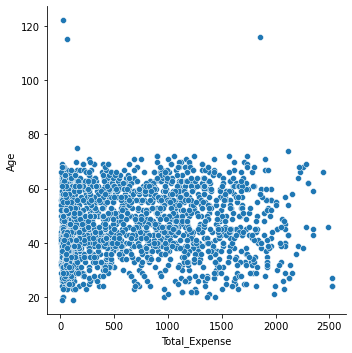

In [36]:
sns.relplot(x="Total_Expense", y="Age",data=df)

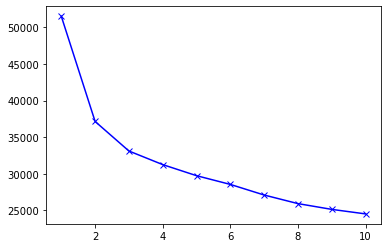

In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

sse={}
for k in range(1,11):
    kmean=KMeans(n_clusters=k,random_state=1).fit(df_scaled)
    lables=kmean.predict(df_scaled)
    sse[k]=kmean.inertia_
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()), 'bx-')
plt.xlable='no. of clusters'
plt.ylable= 'SSE'
plt.show()

In [38]:
labels=pd.DataFrame(kmean.labels_)
labels

,0
0,8
1,4
2,2
3,1
4,0
...,...
2235,2
2236,0
2237,9
2238,5


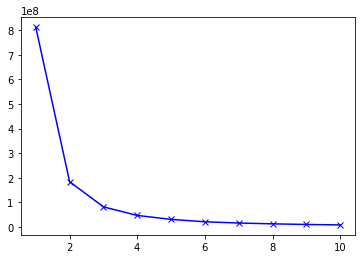

In [39]:
X1=df.loc[:,["Age","Total_Expense"]].values
sse={}
for k in range(1,11):
    kmean=KMeans(n_clusters=k,random_state=1).fit(X1)
    lables=kmean.predict(X1)
    sse[k]=kmean.inertia_
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()), 'bx-')
plt.xlable='no. of clusters'
plt.ylable= 'SSE'
plt.show()

In [40]:
from sklearn.cluster import KMeans 
X1=df[['Age','Total_Expense']]
k_means= KMeans(n_clusters=2,random_state=42)
y_means=k_means.fit_predict(X1)
y_means                        

array([1, 0, 1, ..., 1, 1, 0])

In [41]:
print(k_means.cluster_centers_)

[[  45.2414753   209.73068894]
 [  47.89912827 1314.5765878 ]]


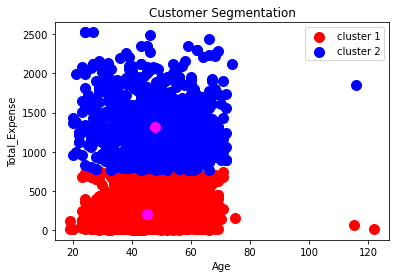

In [42]:

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
X1=df[["Age","Total_Expense"]]
plt.scatter(X1.iloc[y_means==0,0],X1.iloc[y_means==0,1],s=100,c='red',label='cluster 1')
plt.scatter(X1.iloc[y_means==1,0],X1.iloc[y_means==1,1],s=100,c='blue',label='cluster 2')
plt.scatter(k_means.cluster_centers_[:,0], k_means.cluster_centers_[:,1],s=100, c='magenta')
plt.title('Customer Segmentation')
plt.xlabel('Age')
plt.ylabel('Total_Expense')
plt.legend()
plt.show()

In [43]:
# the 2 clusters spread troughout all age. there isn't significant cluster.

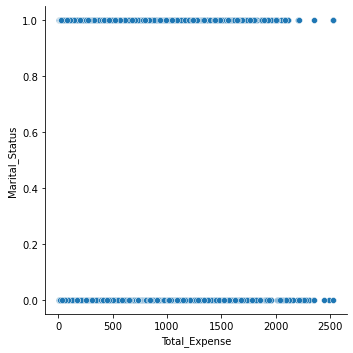

In [44]:
sns.relplot(x="Total_Expense", y="Marital_Status",data=df)

In [45]:
# some of thr customer are married and some of them are single according to total expense.no need to do kmean clustering.

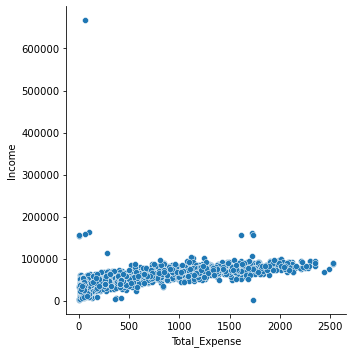

In [46]:
sns.relplot(x="Total_Expense", y="Income",data=df)

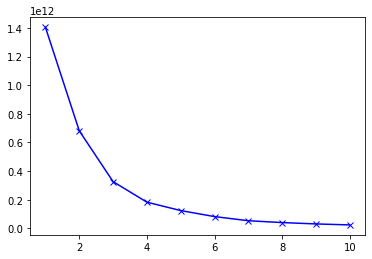

In [47]:
X2=df.loc[:,["Income","Total_Expense"]].values
sse={}
for k in range(1,11):
    kmean=KMeans(n_clusters=k,random_state=1).fit(X2)
    lables=kmean.predict(X2)
    sse[k]=kmean.inertia_
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()), 'bx-')
plt.xlable='no. of clusters'
plt.ylable= 'SSE'
plt.show()

In [48]:
print(kmean.cluster_centers_)

[[4.91037748e+04 3.65486264e+02]
 [7.90836500e+04 1.38425000e+03]
 [2.70234032e+04 7.49483871e+01]
 [6.66666000e+05 6.20000000e+01]
 [1.58024286e+05 7.47857143e+02]
 [5.92876094e+04 7.19634375e+02]
 [3.79443217e+04 1.53204489e+02]
 [9.04352660e+04 1.60254255e+03]
 [1.50353916e+04 7.06433566e+01]
 [6.88371000e+04 1.11053437e+03]]


In [49]:
from sklearn.cluster import KMeans 
X2=df[["Income","Total_Expense"]]
k_means=KMeans()
k_means.fit(X2)

KMeans()

In [50]:
from sklearn.cluster import KMeans 

X2=df[["Income","Total_Expense"]]
k_means= KMeans(n_clusters=2,random_state=42)
y_means=k_means.fit_predict(X2)
y_means                        

array([1, 0, 1, ..., 1, 1, 0])

In [62]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
X2=df[["Income","Total_Expense"]]
plt.scatter(X2.iloc[y_means2==0,0],X2.iloc[y_means2==0,1],s=100,c='red',label='cluster 1')
plt.scatter(X2.iloc[y_means2==1,0],X2.iloc[y_means2==1,1],s=100,c='blue',label='cluster 2')
plt.scatter(k_means.cluster_centers_[:,0],k_means.cluster_centers_[:,1],s=100, c='magenta')
plt.title('Customer Segmentation')
plt.xlabel('Income')
plt.ylabel('Total_Expense')
plt.legend()
plt.show()

NameError: name 'y_means2' is not defined

In [63]:
# cluster 1: High Income ,High Expense     
# cluster 2: low Income, Low Expense

#cluster 1: represents the best kind of customers to have for business.the compagny should target this segment for its new products


In [65]:

k_means= KMeans(n_clusters=2,random_state=42)
k_means.predict([[20000,550]])

NotFittedError: This KMeans instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [66]:
from tkinter import*
import joblib
joblib.dump(k_means,"customer_segmentation")


['customer_segmentation']

In [67]:
model=joblib.load("customer_segmentation")

In [68]:
model.predict([[20000,500]])

NotFittedError: This KMeans instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [69]:
# GUI

from tkinter import*
import joblib
def show_entry_fields():
    p1=int(e1.get())
    p2=int(e2.get())
    
    model=joblib.load('Customer Segmentation')
    result=model.predict([[p1,p2]])
    print("This Customer belongs to cluster no:", result[0])
    
    if result[0] == 0:
        Label(master, text="Customers with Low Income and low Expense")
    elif result[0] == 1:
        Label(master, text="Customers with High Income and High Expense")
master = Tk()
master.title("Customer Segmentation Using Machine Learning")
label=Label(master, text = "Customer Segmentation Using Machine Learning", bg= "black", fg= "white").\
grid(row=0, columnspan=2)

Label(master, text="Income").grid(row=1)
Label(master, text="Total_Expense").grid(row=2)

e1 = Entry(master)
e2 = Entry(master)
e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
Button(master, text='Predict', command=show_entry_fields).grid()

mainloop()


                            
        
        
        

